# ObsID : 0945020136, SRCNUM : 4, Instru : EMOS2
**Simbad :** Galaxy (2dFGRS TGS322Z047) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%404738151&Name=2dFGRS%20TGS322Z047&submit=submit

## ESASky

https://sky.esa.int/esasky/?target=52.97008333333333%20-28.304833333333328&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033152.7-281818
- IAU name : 4XMM J033152.7-281818
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.16"

``GAIA``

- Designation : Gaia DR3 5057378691743871360
- RA : 03h 31m 52.742s
- DEC : -28° 18' 18.52"
- Parallax : -0.7065 mas
- Magnitude G (mag) : 19.6328

``GLADE``

- No : 2 124 866
- RA : 03h 31m 52.754s
- DEC : -28° 18' 18.08"
- Distance : 289.8972 Mpc

``2MASS``

- Name : 03315275-2818185
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.57"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

### Redshift

In [2]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(289.8972)
print("Redshift : z =", z)

Redshift : z = 0.06768950805293442


## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020136_SRCNUM4_EMOS2_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.295e-03 +/- 1.203e-03 (71.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-75
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 7690 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020136_SRCNUM4_EMOS2_background_spectrum.fits
  Background Exposure Time: 7690 sec
 Using Response (RMF) File            ObsID0945020136_SRCNUM4_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020136_SRCNUM4_EMOS2.arf



In [4]:
n_cts = 7.295e-03*7690

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 56.09855

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")

(-0.5, 854.5, 661.5, -0.5)

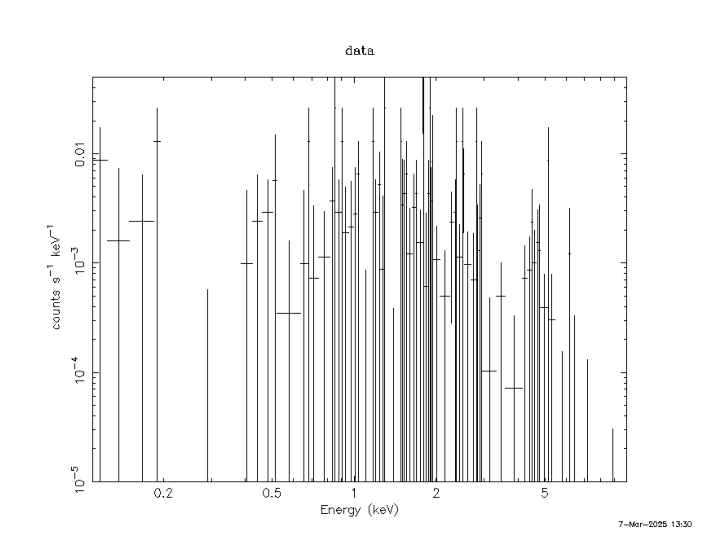

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              4.207625e+06     using 75 bins.

Te

(-0.5, 856.5, 659.5, -0.5)

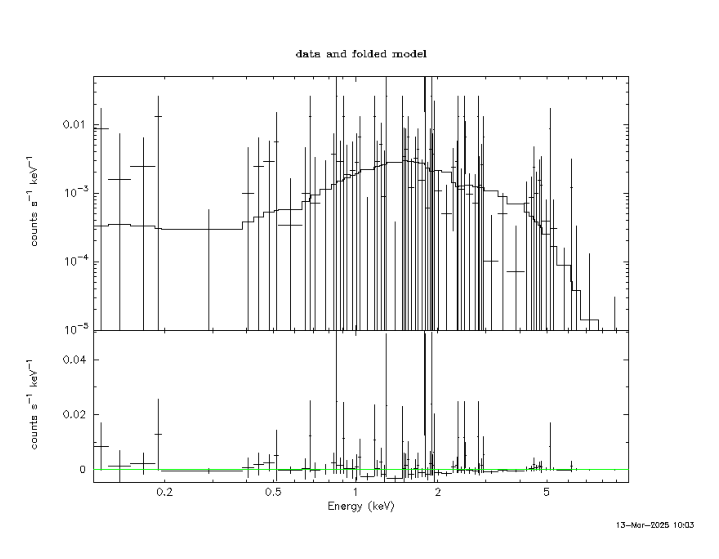

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [10]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.205362e+06     using 75 bins.

Test statistic : Chi-Squared              1.943663e+11     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              4.313425e+06     using 75 bins.

Test statistic : Chi-Squared              1.999569e+11     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
        

(-0.5, 856.5, 661.5, -0.5)

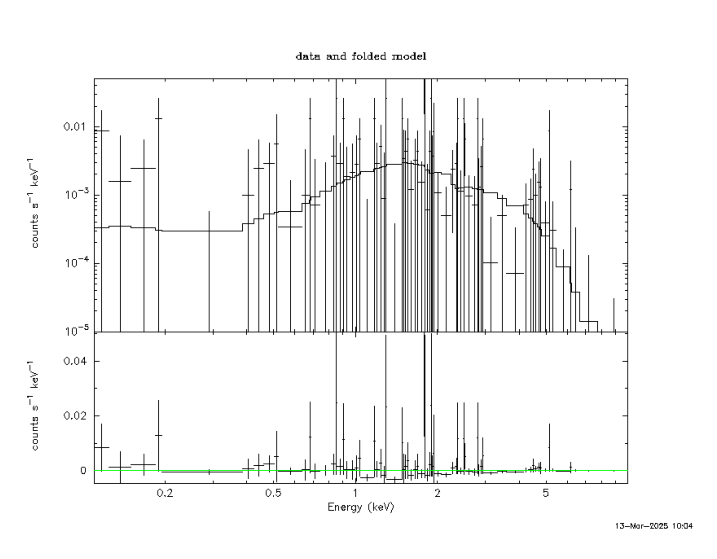

In [12]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody2_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
**tbabs :**

In [13]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.044843e+06     using 75 bins.

Test statistic : Chi-Squared              8.426030e+09     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
262948       195044       -3      0.469593       189.180      0.304734
118005       147165       -4      0.193898       199.284      0.111478
60841.5      178998       -2     0.0892444       199.332     0.0508862


(-0.5, 857.5, 660.5, -0.5)

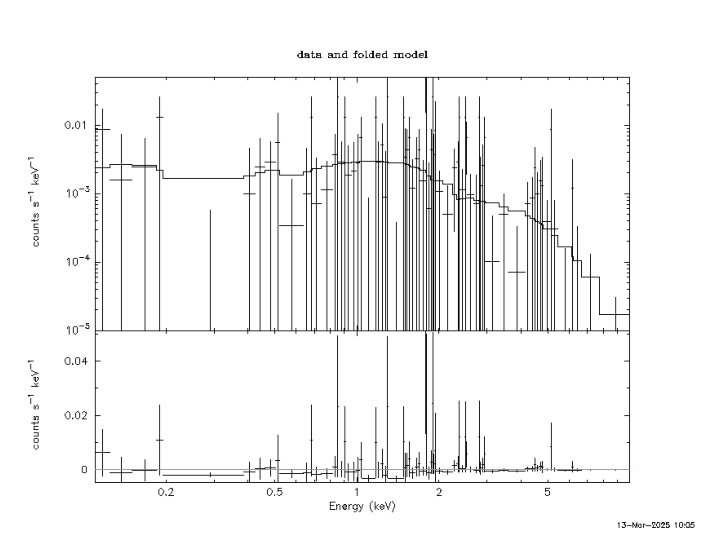

In [15]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [16]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.041754e+06     using 75 bins.

Test statistic : Chi-Squared              8.394492e+09     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              1.128513e+06     using 75 bins.

Test statistic : Chi-Squared              9.603464e+09     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
       

(-0.5, 859.5, 661.5, -0.5)

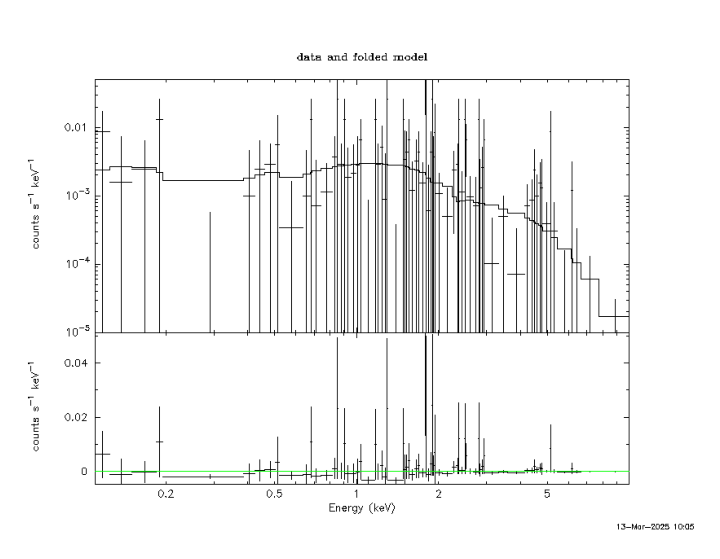

In [17]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss2_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [19]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = moz.zTBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                394002.2     using 75 bins.

Test statistic : Chi-Squared              1.585315e+09     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
131.582      114346       -3       673.036       48.3603     0.0710795
131.579      0.00553


***XSPEC Error:  No variable parameters for fit 

Exception: Error executing command: fit

**ztbabs :**

In [20]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                388948.0     using 75 bins.

Test statistic : Chi-Squared              1.545772e+09     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                483534.0     using 75 bins.

Test statistic : Chi-Squared              2.500979e+09     using 75 bi

(-0.5, 856.5, 656.5, -0.5)

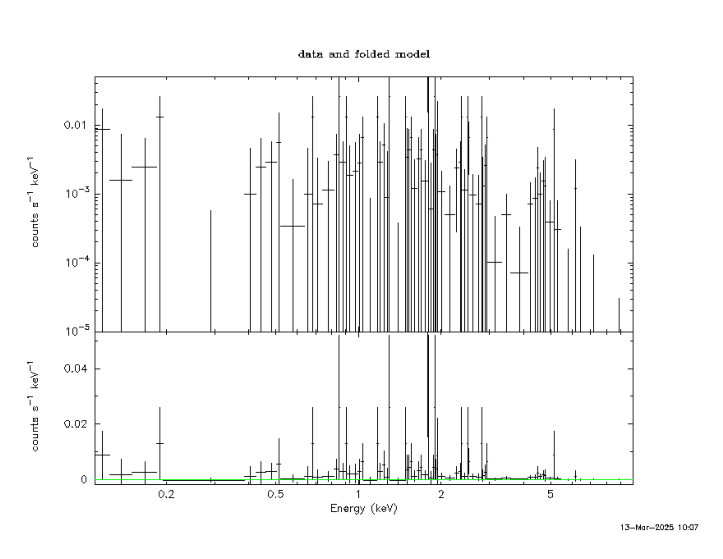

In [21]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2_z.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [22]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.498803e+06     using 75 bins.

Test statistic : Chi-Squared              5.038230e+10     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
1.38447e+06  626244       -3      0.154195       8.00625     0.0614168
298.859      4.97455e+06  -4       156.341       1.30026     0.0300794
131.52       1091.6       -5       32.8244       7.67720    0.0044185

(-0.5, 861.5, 660.5, -0.5)

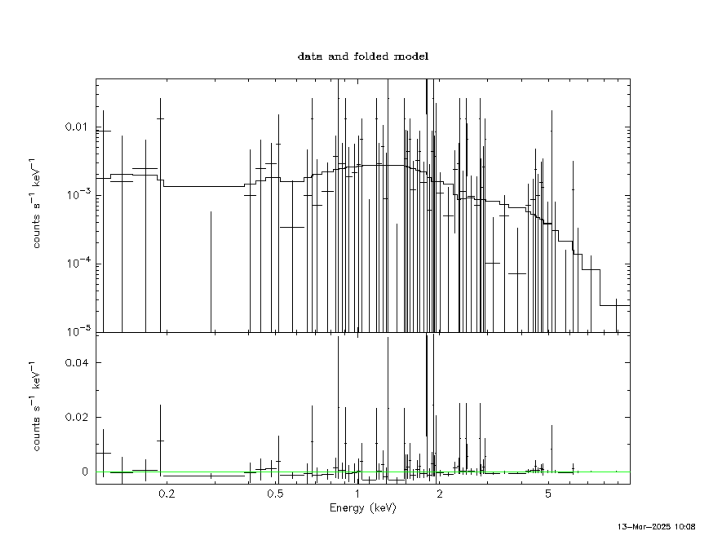

In [23]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [24]:
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.494093e+06     using 75 bins.

Test statistic : Chi-Squared              5.029436e+10     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              2.641520e+06     using 75 bins.

Test statistic : Chi-Squared              5.441295e+10     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
     

(-0.5, 856.5, 661.5, -0.5)

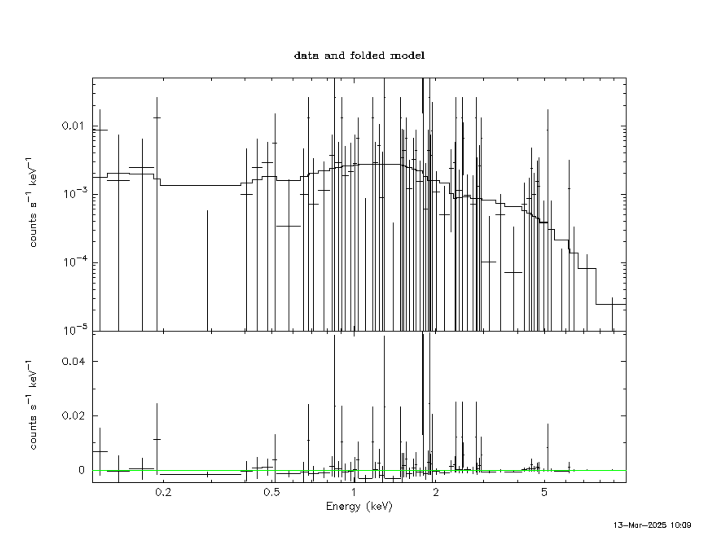

In [25]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2_z.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.9697976°
- Dec = -28.3050451°

53.97 -28.31

**Column density :** nH = 3*10^20 cm^-2

In [27]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec"+color.END)
#print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print(f"(ztbabs) : {nH_powerlaw_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 340248.74220357835
(ztbabs) : 295575.09735671035

bremss
(tbabs) : 53237.081841711566
(ztbabs) : 111748.20265636817

apec
(ztbabs) : 9.999985789729918e+27

powerlaw
(tbabs) : 55442.02838806485
(ztbabs) : 48787.95710279056


## Flux
### X-ray flux

In [28]:
AllModels.calcFlux(".2 12.0")

 Model Flux 8.4843e-05 photons (3.9232e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [29]:
Flux = 3.9232e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray  flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray  flux : F_X = 3.9232e-13 ergs/cm^2/s


### Optical flux

In [30]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 19.6328

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 1.4725474536744745e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [31]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 2.664226534914286
F_x-ray = 2.664226534914286*F_optical


## Luminosity

In [32]:
"""GAIA"""

P_mas = 0.7065 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")
print()

"""GLADE"""

d_kpc = 289897.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 4.3675866949752303e+21 cm
Luminosité : 9.40444955323309e+31 erg/s

(GLADE)
Distance : 8.945357900400001e+26 cm
Luminosité : 3.944988621759915e+42 erg/s
